# Research Focus: Exploring Shakespeare's Sonnets

My research focuses on studying William Shakespeare's sonnets to understand what themes and emotions they explore and how they show Shakespeare's skill as a poet. These sonnets are famous for their deep thoughts on love, beauty, time, and human feelings. The main question I want to answer is: What common themes and emotions do Shakespeare's sonnets discuss, and why are they important in literature? 

Many studies have looked at Shakespeare's sonnets before, but my approach is unique because I will use advanced methods to analyze the text. I will use tools that study language patterns and emotions, like NLTK and TextBlob, along with graphs to visualize the data. This will help me see patterns and themes in Shakespeare's writing that might not be obvious. I will use the complete text of Shakespeare's sonnets for this analysis, making sure to use reliable sources. This method will help me understand how Shakespeare's words create feelings, tell stories, and make images that have lasted for centuries in literature discussions.

In [1]:
# Module to remove punctuation from string library
from string import punctuation
# Module to count word frequencies
from collections import Counter
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
from nltk.corpus import stopwords
import spacy


In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# Graphics should appear "inline" (within the Jupyter Notebook instead of somewhere else)
%matplotlib inline
plt.style.use('classic')
import seaborn as sns

In [3]:
import os
os.getcwd()

'/Users/amyhuang'

In [4]:
os.chdir("/Users/amyhuang/Desktop/")
os.getcwd()

'/Users/amyhuang/Desktop'

In [5]:
text = open("shakespeare.txt").read()
print(text)

THE SONNETS

by William Shakespeare

From fairest creatures we desire increase,
That thereby beauty's rose might never die,
But as the riper should by time decease,
His tender heir might bear his memory:
But thou contracted to thine own bright eyes,
Feed'st thy light's flame with self-substantial fuel,
Making a famine where abundance lies,
Thy self thy foe, to thy sweet self too cruel:
Thou that art now the world's fresh ornament,
And only herald to the gaudy spring,
Within thine own bud buriest thy content,
And tender churl mak'st waste in niggarding:
Pity the world, or else this glutton be,
To eat the world's due, by the grave and thee.

When forty winters shall besiege thy brow,
And dig deep trenches in thy beauty's field,
Thy youth's proud livery so gazed on now,
Will be a tattered weed of small worth held:  
Then being asked, where all thy beauty lies,
Where all the treasure of thy lusty days;
To say within thine own deep sunken eyes,
Were an all-eating shame, and thriftless prais

# How many words in this file?

In [6]:
len(text.split())

17589

# Unique words in this text

In [7]:
#how many unique words
len(set(text.split()))

4578

In [8]:
# Print the unique words 
print(set(text.lower().split()))

{'injuries', 'an', 'sound', 'subtleties.', 'private', 'short,', "garments'", 'glory', "perceiv'st,", 'robbery', 'heir,', 'truths', 'drink,', 'untold,', 'crossed:', 'transfix', 'curse,', 'true', 'extern', "lover's", 'consent', 'acceptable', 'why', 'uneared', 'truth', "o'ertake", 'verse', 'thence', 'deserving?', "bett'ring", 'winter,', 'defeat,', 'secret', 'twenty?', "put'st", 'desiring', 'of', 'waiting', 'spot', 'pyramids', 'refuse', 'scope', 'shown.', 'defect,', 'will,', 'lord', 'woeful', 'partly', 'hate:', 'incapable', 'attend,', 'conspire,', 'break,', 'moiety,', 'wretched', 'plague', 'purpose,', 'impair', 'profound', 'lawful', 'twilight', 'advantage', 'divide', 'sullied', 'strange,', 'new-appearing', 'health', 'bell', 'look', 'drown', 'hair,', 'abysm', 'each', 'tyranny,', 'transgression', 'watchman', 'censures', 'ill:', 'pleasure,', 'prayers', 'she', 'injuries:', 'those,', 'feeble', 'joy:', 'praises', 'least', 'thing)', 'live', 'house', 'pen', 'queen,', 'wrinkle', 'kings,', 'continua

# Word Frequency Analysis

The function lowercase the string in Shakespearean works, remove punctuation, tokenize, lemmatize, and remove stopwords. I also extend toppwords with common Shakespearan pronouns such as "I, thy, thou, thee". The function should return the lemmas present in the string. 

In [9]:
nlp = spacy.load('en_core_web_sm')
stop_words = set(stopwords.words('english'))

# Extend stopwords with Shakespearean pronouns
shakespearean_pronouns = {"i", "thy", "thou", "thee", "I"}
stop_words.update(shakespearean_pronouns)

def func(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in punctuation])
    tokens = text.split()
    lemmas = [token.lemma_ for token in nlp(' '.join(tokens)) if token.lemma_ not in stop_words]
    return lemmas

lemmas = func(text)
print(func(text))

['sonnet', 'william', 'shakespeare', 'fair', 'creature', 'desire', 'increase', 'thereby', 'beautys', 'rise', 'might', 'never', 'die', 'riper', 'time', 'decease', 'tender', 'heir', 'might', 'bear', 'memory', 'contract', 'thine', 'bright', 'eye', 'feedst', 'light', 'flame', 'selfsubstantial', 'fuel', 'make', 'famine', 'abundance', 'lie', 'self', 'foe', 'sweet', 'self', 'cruel', 'art', 'world', 'fresh', 'ornament', 'herald', 'gaudy', 'spring', 'within', 'thine', 'bud', 'buriest', 'content', 'tender', 'churl', 'makst', 'waste', 'niggarde', 'pity', 'world', 'else', 'glutton', 'eat', 'world', 'due', 'grave', 'forty', 'winter', 'shall', 'besiege', 'brow', 'dig', 'deep', 'trench', 'beautys', 'field', 'youth', 'proud', 'livery', 'gaze', 'tattered', 'weed', 'small', 'worth', 'hold', 'ask', 'beauty', 'lie', 'treasure', 'lusty', 'day', 'say', 'within', 'thine', 'deep', 'sunken', 'eye', 'alleating', 'shame', 'thriftless', 'praise', 'much', 'praise', 'deserve', 'beauty', 'use', 'couldst', 'answer', 

In [10]:
def countFreq(lemmas):
    return Counter(lemmas)

# Calculate frequency of lemmas
freq = countFreq(lemmas) 

# Display the 20 most common words
most_common = freq.most_common(20)
print(most_common)

df = pd.DataFrame(data = most_common, 
                         columns = ["Word", "Frequency"])
df

[('love', 208), ('eye', 94), ('doth', 88), ('make', 82), ('self', 77), ('time', 76), ('mine', 63), ('sweet', 61), ('heart', 61), ('beauty', 60), ('shall', 59), ('see', 56), ('art', 53), ('fair', 52), ('yet', 51), ('give', 46), ('well', 46), ('thine', 44), ('live', 44), ('day', 43)]


,Word,Frequency
0,love,208
1,eye,94
2,doth,88
3,make,82
4,self,77
5,time,76
6,mine,63
7,sweet,61
8,heart,61
9,beauty,60


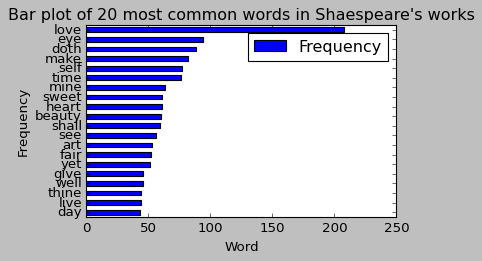

In [11]:
df.plot.barh(x = "Word", y = "Frequency", figsize = (5,3)).invert_yaxis()
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.title("Bar plot of 20 most common words in Shaespeare's works");

Word frequency analysis of Shakespeare's sonnets shows common themes and stylistic elements typical of his poetry. The frequent use of words like 'love,' 'beauty,' and 'emotion' emphasizes the romantic and sentimental tone of the sonnets. Words such as 'self,' 'heart,' and 'time' suggest a deep reflection on personal identity, feelings, and the passage of time. Terms like 'art' and 'make' highlight themes of creativity and the transformative power of poetry. The use of old-fashioned words ('doth,' 'thine') reflects Shakespeare's historical language style, adding a formal and poetic flair to the sonnets. Overall, this analysis reveals that Shakespeare's sonnets are characterized by themes of love, beauty, emotion, and introspection, expressed through personal reflection and artistic expression. It provides a quantitative glimpse into the key themes that define Shakespeare’s poetic approach.

# What is the lexical diversity of this text?

In [21]:
len(set(lemmas)) / len(lemmas)

0.2740940199708291

A lexical diversity of 0.2471 for Shakespeare's sonnets means that about 24.71% of the words used are unique. This suggests there's a good mix of different words, but also a fair amount of repetition. This repetition is intentional and helps to emphasize the main ideas and themes, like love, beauty, and time, which are central to the sonnets. By repeating certain words, Shakespeare creates a rhythmic and memorable quality to his poetry, enhancing its emotional impact and poetic style. His deliberate use of repetition ensures these themes are strongly conveyed and resonate with readers.


# Sentiment Analysis

In [12]:
!pip3 install textblob
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 54] Connection
[nltk_data]     reset by peer>


False

In [13]:
from textblob import TextBlob

def analyze_sentiment(text):
    blob = TextBlob(text)
    for sentence in blob.sentences:
        print(f"Sentence: {sentence}")
        print(f"Sentiment: {sentence.sentiment}")

analyze_sentiment(text)

Sentence: THE SONNETS

by William Shakespeare

From fairest creatures we desire increase,
That thereby beauty's rose might never die,
But as the riper should by time decease,
His tender heir might bear his memory:
But thou contracted to thine own bright eyes,
Feed'st thy light's flame with self-substantial fuel,
Making a famine where abundance lies,
Thy self thy foe, to thy sweet self too cruel:
Thou that art now the world's fresh ornament,
And only herald to the gaudy spring,
Within thine own bud buriest thy content,
And tender churl mak'st waste in niggarding:
Pity the world, or else this glutton be,
To eat the world's due, by the grave and thee.
Sentiment: Sentiment(polarity=0.1770833333333333, subjectivity=0.68125)
Sentence: When forty winters shall besiege thy brow,
And dig deep trenches in thy beauty's field,
Thy youth's proud livery so gazed on now,
Will be a tattered weed of small worth held:  
Then being asked, where all thy beauty lies,
Where all the treasure of thy lusty day

I use TextBlob to analyze the sentiment of each sentence.
The results are stored in a DataFrame with columns for the sentence, polarity, and subjectivity.


In [14]:
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment_data = []
    for sentence in blob.sentences:
        sentiment_data.append({
            'Sentence': str(sentence),
            'Polarity': sentence.sentiment.polarity,
            'Subjectivity': sentence.sentiment.subjectivity
        })
    return pd.DataFrame(sentiment_data)

sentiment_df = analyze_sentiment(text)
print(sentiment_df.head())

                                            Sentence  Polarity  Subjectivity
0  THE SONNETS\n\nby William Shakespeare\n\nFrom ...  0.177083      0.681250
1  When forty winters shall besiege thy brow,\nAn...  0.241667      0.550000
2  How much more praise deserved thy beauty's use...  0.312500      0.412500
3  This were to be new made when thou art old,\nA...  0.059091      0.563636
4  Look in thy glass and tell the face thou viewe...  0.300000      0.500000


# Scatter plot for sentiment analysis

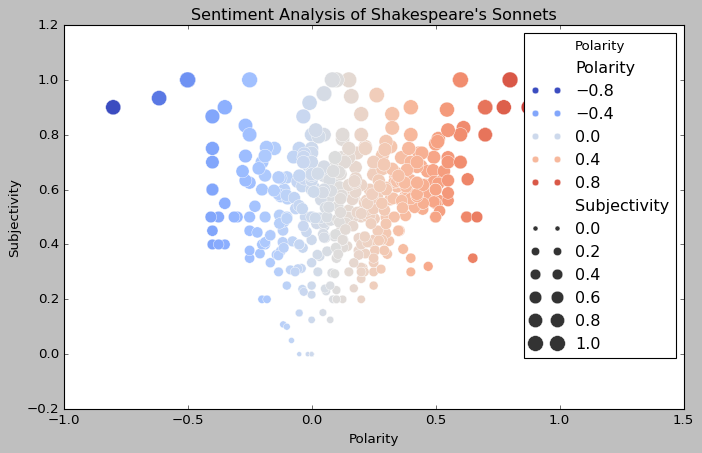

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Polarity', y='Subjectivity', data=sentiment_df, hue='Polarity', palette='coolwarm', size='Subjectivity', sizes=(20, 200))
plt.title('Sentiment Analysis of Shakespeare\'s Sonnets')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.legend(title='Polarity')
plt.show()

This plot shows the relationship between polarity and subjectivity. Each point represents a sentence, with the size of the points indicating the subjectivity. It provides insights into how sentiment varies throughout the text, highlighting emotional peaks and more objective passages.


# Bar plot for sentiment polarity distribution

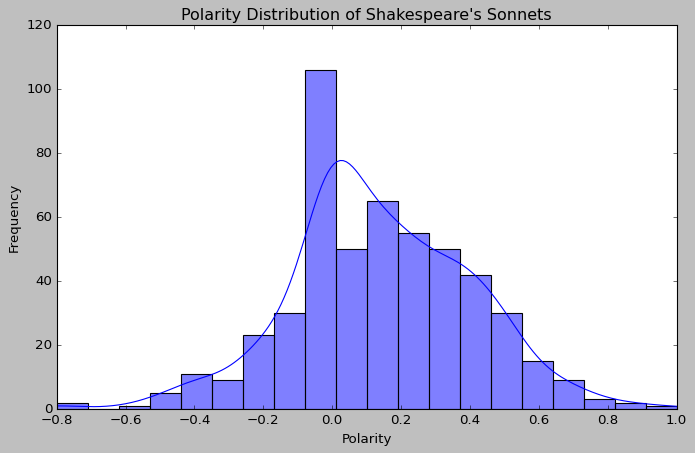

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(sentiment_df['Polarity'], bins=20, kde=True, color='blue')
plt.title('Polarity Distribution of Shakespeare's Sonnets')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

The histogram of Shakespeare's sonnets' polarity distribution centers around 0.15. This tells us how positive, negative, or neutral the text is in sentiment analysis. The graph's symmetry shows a balanced mix of positive and negative feelings throughout the sonnets. This balance suggests that Shakespeare explores a wide range of emotions and experiences, reflecting human complexity. With a center at 0.15, the sonnets overall lean slightly towards positivity, indicating that the emotions expressed are generally more positive than negative. Shakespeare often focuses on themes like love, admiration, and beauty, praising both loved ones and nature. This positivity in sentiment matches these themes well. His skillful use of language contrasts positive and negative images to create depth. The overall positive sentiment reflects his ability to use language that acknowledges pain but often returns to themes of hope, beauty, and admiration.


# Bar plot for sentiment subjectivity distribution

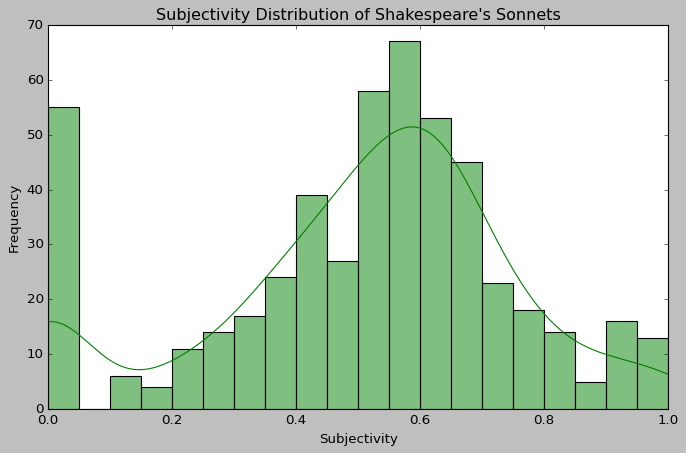

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(sentiment_df['Subjectivity'], bins=20, kde=True, color='green')
plt.title('Subjectivity Distribution of Shakespeare\'s Sonnets')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.show()

Subjectivity in text analysis measures how much personal opinion or emotion is in the text. With an average score of 0.6, Shakespeare's sonnets tend to be quite subjective. This means they often express personal feelings and opinions, which is common in poetry and especially in sonnets. The high subjectivity fits well with the themes of love, passion, beauty, and deep thoughts that Shakespeare explores in his sonnets. It shows how skilled he was at expressing his own emotions and personal experiences.

There's a notable spike in the graph at subjectivity 0, indicating that there are 55 instances where the sonnets are purely objective. This means those lines are more about describing facts or scenes without personal feelings. This mix of high subjectivity with some objective descriptions adds variety and balance to the sonnets. The objective parts might help ground the reader in reality before diving back into the poet's emotional world. Shakespeare's ability to blend subjective feelings with objective observations shows his talent and depth as a poet. This mix keeps readers engaged, taking them through a journey of personal reflection and vivid descriptions that make the sonnets relatable and powerful.



# N-Gram Analysis

In [34]:
from nltk import ngrams

In [45]:
def ngram_analysis(text, n=3):
    words = func(text)
    n_grams = ngrams(words, n)
    return Counter(n_grams)

bigrams = ngram_analysis(text, 3)
print(bigrams.most_common(10))

[(('mine', 'eye', 'heart'), 4), (('thine', 'eye', 'love'), 3), (('fair', 'kind', 'true'), 3), (('ten', 'time', 'happy'), 2), (('every', 'fair', 'fair'), 2), (('love', 'sort', 'mine'), 2), (('sort', 'mine', 'mine'), 2), (('mine', 'mine', 'good'), 2), (('mine', 'good', 'report'), 2), (('hadst', 'love', 'love'), 2)]


The results of analyzing n-grams in Shakespeare's sonnets show us common combinations of words or phrases that appear frequently together. For example, trigrams like ('mine', 'eye', 'heart'), ('thine', 'eye', 'love'), and ('fair', 'kind', 'true') often appear, emphasizing themes of love, beauty, and personal relationships. These combinations suggest how Shakespeare explores the links between sight ('eye'), emotions ('heart'), and personal qualities ('fair', 'kind', 'true').

Other trigrams like ('love', 'sort', 'mine'), ('sort', 'mine', 'mine'), and ('hadst', 'love', 'love') highlight the repetition of words, particularly around the concept of love. This repetition underscores the importance of love and personal possession ('mine') in the sonnets.
Shakespeare's choice to repeat specific words and phrases in these patterns helps create the rhythmic and flowing quality of his poetry. It adds a musical element that makes the sonnets memorable.

Phrases involving personal pronouns and emotions, such as ('mine', 'eye', 'heart') and ('thine', 'eye', 'love'), reveal Shakespeare's introspective exploration of feelings and thoughts. He often dives deep into the inner world of the speaker, reflecting on desires, emotions, and relationships.

The trigram ('ten', 'time', 'happy') shows how Shakespeare uses numbers to emphasize emotions or qualities, demonstrating his technique of using specific words to highlight the intensity or significance of certain ideas.

Lastly, the trigram ('every', 'fair', 'fair') suggests that Shakespeare repeats certain phrases within the sonnets to reinforce particular ideas or themes. This repetition aims to make a stronger impact on the reader and emphasize specific motifs.






In [47]:
def ngram_analysis(text, n=6):
    words = func(text)
    n_grams = ngrams(words, n)
    return Counter(n_grams)

bigrams = ngram_analysis(text, 6)
print(bigrams.most_common(10))

[(('love', 'sort', 'mine', 'mine', 'good', 'report'), 2), (('sonnet', 'william', 'shakespeare', 'fair', 'creature', 'desire'), 1), (('william', 'shakespeare', 'fair', 'creature', 'desire', 'increase'), 1), (('shakespeare', 'fair', 'creature', 'desire', 'increase', 'thereby'), 1), (('fair', 'creature', 'desire', 'increase', 'thereby', 'beautys'), 1), (('creature', 'desire', 'increase', 'thereby', 'beautys', 'rise'), 1), (('desire', 'increase', 'thereby', 'beautys', 'rise', 'might'), 1), (('increase', 'thereby', 'beautys', 'rise', 'might', 'never'), 1), (('thereby', 'beautys', 'rise', 'might', 'never', 'die'), 1), (('beautys', 'rise', 'might', 'never', 'die', 'riper'), 1)]


This phrase, ('love', 'sort', 'mine', 'mine', 'good', 'report'), appears twice in the text. It indicates that these words together are important and might show up often in Shakespeare's sonnets. The repetition emphasizes ideas about love, personal ownership ("mine"), and having a good reputation ("good report").

# Word Cloud Visualization

In [22]:
!pip3 install wordcloud

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

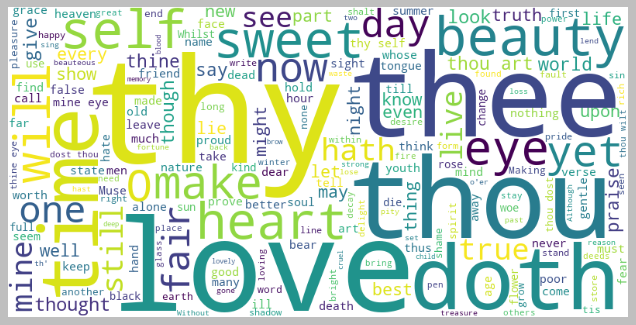

In [43]:
def create_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
create_word_cloud(text)

This word cloud image displaying the most frequent words from Shakespeare's sonnets. Words that appear more frequently are larger and more prominent, while less frequent words are smaller.

# Conclusion: 
Based on studying Shakespeare's sonnets, we found that words like 'love,' 'beauty,' and 'time' are repeated a lot, showing these are important themes. Shakespeare's poems express deep feelings and thoughts in a positive way, often sharing personal views. The variety of words used is moderate, around 25% are unique, with some words repeated for emphasis.

However, our study has limits. We used tools that might not catch all the details of poetry or historical context. Also, understanding feelings and themes can change based on who's reading it.

Next, we could look closer at how historical events affected Shakespeare's writing or compare his work with other poets of his time. Using better tech could help us dig deeper into his writing style. Also, looking at the poems in more detail could give us a better feel for what Shakespeare meant.

In the end, Shakespeare's sonnets still grab us with their themes and style. While this study tells us a lot, more research could help us really understand Shakespeare's genius and his impact on literature and culture.




